In [ ]:
from tensorflow.keras.layers import Embedding
e = Embedding(200, 32, input_length=50)

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer  
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
from pathlib import Path
import os
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from pathlib import Path
import os
DATA_PATH=Path('./dat/')
DATA_PATH.mkdir(exist_ok=True)
#if not os.path.exists('./dat/aclImdb_v1.tar.gz'):
if not os.path.exists('./dat/aclImdb'):
    !curl -O http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz 
    !tar -xf aclImdb_v1.tar.gz -C {DATA_PATH}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  21.1M      0  0:00:03  0:00:03 --:--:-- 21.1M


In [ ]:
import numpy as np
CLASSES = ['neg', 'pos']#, 'unsup']
PATH=Path('./dat/aclImdb/')

def get_texts(path):
    texts,labels = [],[]
    for idx,label in enumerate(CLASSES):
        for fname in (path/label).glob('*.*'):
            #texts.append(fixup(fname.open('r', encoding='utf-8').read()))
            texts.append(fname.open('r', encoding='utf-8').read())
            labels.append(idx)
    #return np.array(texts),np.array(labels)
    return texts, labels

In [ ]:
trn_texts,trn_labels = get_texts(PATH/'train')
tst_texts,tst_labels = get_texts(PATH/'test')

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
import numpy as np
# define documents
docs = ['Well done!',
'Good work','Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']
# define class labels
labels = [1,1,1,1,1,0,0,0,0,0]
# integer encode the documents
#vocab_size = 50

#encoded_docs = [one_hot(d, vocab_size) for d in docs]
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)

print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
labels = np.array(labels)
print(labels)
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
model.summary()
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]
[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]
[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]
[1 1 1 1 1 0 0 0 0 0]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 8)              120       
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
___________________________________________

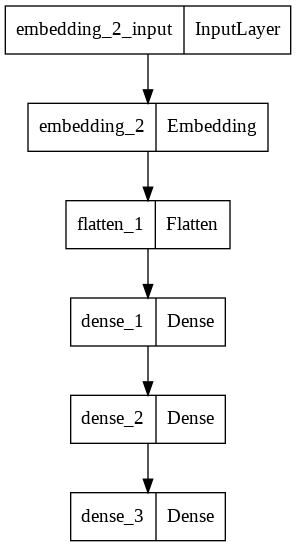

In [ ]:
emb_sz = 50
n_categories = 10
n_latent_factors = min(n_categories//2, emb_sz)
model = models.Sequential()
model.add(layers.Embedding(vocab_size+1, n_latent_factors, input_length=vocab_size))
model.add(layers.Flatten())
model.add(layers.Dense(emb_sz, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
plot_model(model)

In [ ]:
vocab_sz = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_sz)

tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)
#vocab_sz = len(tok.word_index)

# Extract binary BoW features
x_train = tok.sequences_to_matrix(train_data, mode='binary')
x_val = tok.sequences_to_matrix(test_data, mode='binary')
y_train = np.asarray(train_labels).astype('float32')
y_val = np.asarray(test_labels).astype('float32')

emb_sz = 50
model = models.Sequential()
model.add(layers.Embedding(vocab_sz+1, emb_sz, input_length=vocab_sz))
model.add(layers.Flatten())
model.add(layers.Dense(emb_sz, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
plot_model(model)

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
			  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

17464789/17464789 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
49/49 [==============================] - 179s 4s/step - loss: 2.7737 - binary_accuracy: 0.5048 - val_loss: 0.6650 - val_binary_accuracy: 0.6963
Epoch 2/20
49/49 [==============================] - 182s 4s/step - loss: 0.6133 - binary_accuracy: 0.7034 - val_loss: 0.5017 - val_binary_accuracy: 0.7243
Epoch 3/20
49/49 [==============================] - 176s 4s/step - loss: 0.4311 - binary_accuracy: 0.8108 - val_loss: 0.6285 - val_binary_accuracy: 0.6249
Epoch 4/20
49/49 [==============================] - 177s 4s/step - loss: 0.2840 - binary_accuracy: 0.8813 - val_loss: 0.3842 - val_binary_accuracy: 0.8226
Epoch 5/20
49/49 [==============================] - 180s 4s/step - loss: 0.2910 - binary_accuracy: 0.8953 - val_loss: 0.2859 - val_binary_accuracy: 0.8850
Epoch 6/20
49/49 [==============================] - 178s 4s/step - loss: 0.2024 - binary_accuracy: 0.9201 - val_loss: 0.2987 - val_binary_accuracy: 0.8834
Epoch 7/20
49/49 [==============================] - 178s 4s/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

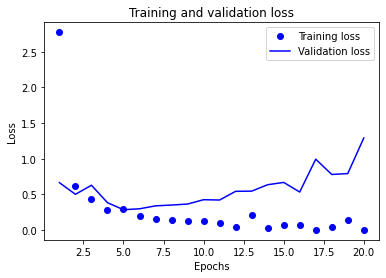

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

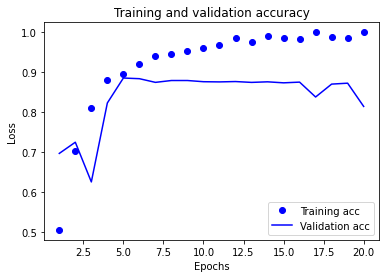

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
(x_train, y_train), (x_val, y_val) = imdb.load_data(num_words=vocab_size)

y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_val).astype('float32')


max_length = 100
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_val = pad_sequences(x_val, maxlen=max_length, padding='post')


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

In [ ]:
n_latent_factors = 25
model = models.Sequential()
model.add(layers.Embedding(vocab_size+1, n_latent_factors, input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 25)           250025    
                                                                 
 flatten_4 (Flatten)         (None, 2500)              0         
                                                                 
 dense_10 (Dense)            (None, 16)                40016     
                                                                 
 dense_11 (Dense)            (None, 16)                272       
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 290,330
Trainable params: 290,330
Non-trainable params: 0
_________________________________________________________________


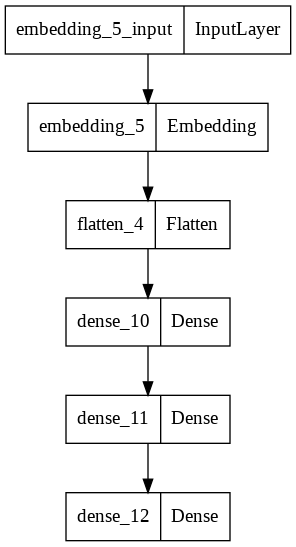

In [ ]:
plot_model(model)

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
			  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 3s 29ms/step - loss: 0.6882 - binary_accuracy: 0.5563 - val_loss: 0.6713 - val_binary_accuracy: 0.5888
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5972 - binary_accuracy: 0.7434 - val_loss: 0.5320 - val_binary_accuracy: 0.7930
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4082 - binary_accuracy: 0.8665 - val_loss: 0.4089 - val_binary_accuracy: 0.8306
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2698 - binary_accuracy: 0.9115 - val_loss: 0.3850 - val_binary_accuracy: 0.8329
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1905 - binary_accuracy: 0.9382 - val_loss: 0.3603 - val_binary_accuracy: 0.8449
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1277 - binary_accuracy: 0.9664 - val_loss: 0.3866 - val_binary_accuracy: 0.8400
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

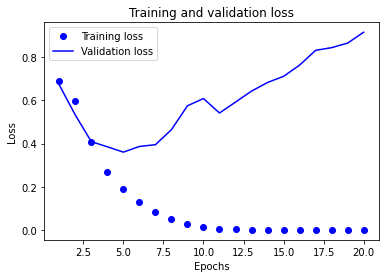

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

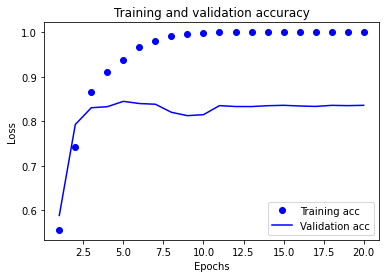

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2022-11-19 16:20:31--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-11-19 16:20:31--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-11-19 16:20:32--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
from numpy import asarray
from numpy import zeros
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
# define documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']
# define class labels
labels = [1,1,1,1,1,0,0,0,0,0]
labels = np.array(labels)
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.100d.txt', mode='rt', encoding='utf-8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
# define model
model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
model.summary()
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]
[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]
Loaded 400000 word vectors.
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 4, 100)            1500      
                                                                 
 flatten_6 (Flatten)         (None, 400)               0         
                                                                 
 dense_14 (Dense)            (None, 1)                 401       
                                                                 
Total params: 1,901
Trainable params: 401
Non-trainable params: 1,500
_________________________________________________________________
Accuracy: 100.000000


In [ ]:
# BoW vectors with GloVe Embeddings

In [ ]:
vocab_size = 10000
(x_train, y_train), (x_val, y_val) = imdb.load_data(num_words=vocab_size)

y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_val).astype('float32')


max_length = 100
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_val = pad_sequences(x_val, maxlen=max_length, padding='post')


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

In [ ]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.100d.txt', mode='rt', encoding='utf-8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
# define model
model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False)

Loaded 400000 word vectors.


In [ ]:
n_latent_factors = 100
model = models.Sequential()
model.add(layers.Embedding(vocab_sz, n_latent_factors, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_7 (Flatten)         (None, 10000)             0         
                                                                 
 dense_15 (Dense)            (None, 16)                160016    
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,160,305
Trainable params: 160,305
Non-trainable params: 1,000,000
_________________________________________________________________


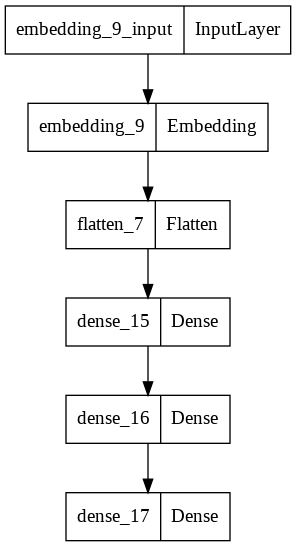

In [ ]:
plot_model(model)

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
			  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 3s 43ms/step - loss: 0.6999 - binary_accuracy: 0.5155 - val_loss: 0.6958 - val_binary_accuracy: 0.5038
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.6817 - binary_accuracy: 0.5653 - val_loss: 0.6929 - val_binary_accuracy: 0.5279
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.6624 - binary_accuracy: 0.6057 - val_loss: 0.6995 - val_binary_accuracy: 0.5290
Epoch 4/20
30/30 [==============================] - 1s 49ms/step - loss: 0.6402 - binary_accuracy: 0.6347 - val_loss: 0.7163 - val_binary_accuracy: 0.5355
Epoch 5/20
30/30 [==============================] - 2s 63ms/step - loss: 0.6169 - binary_accuracy: 0.6627 - val_loss: 0.7129 - val_binary_accuracy: 0.5362
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.5933 - binary_accuracy: 0.6909 - val_loss: 0.7326 - val_binary_accuracy: 0.5348
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

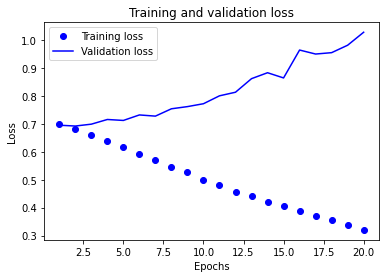

In [ ]:

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

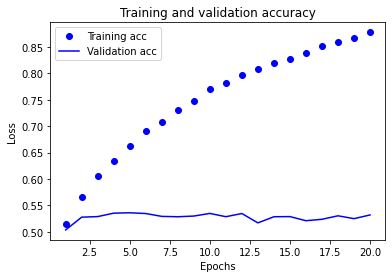

In [ ]:

plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()